In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('train_var_1.csv')

In [3]:
df

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,6.901420,24.569658,0.862829,0.737416,G5V,20.449126,1
1,4.334196,2.198947,0.593309,1.153210,G2Ib,13.043324,0
2,7.873019,11.750465,0.616568,0.589166,F5V,17.736492,1
3,8.110014,2.143815,0.848508,1.322107,K2III,15.592469,0
4,8.025193,4.165622,0.899296,1.141646,K5III,16.379680,0
...,...,...,...,...,...,...,...
31636,7.561113,0.692340,0.843319,0.252874,A0II,12.542120,0
31637,8.078011,3.002784,0.689891,0.971966,G8III,15.379710,0
31638,7.065964,7.820498,0.885794,0.435381,F3IV/V,16.737442,1
31639,8.685452,2.643033,1.064647,0.988600,K0III,14.859882,0


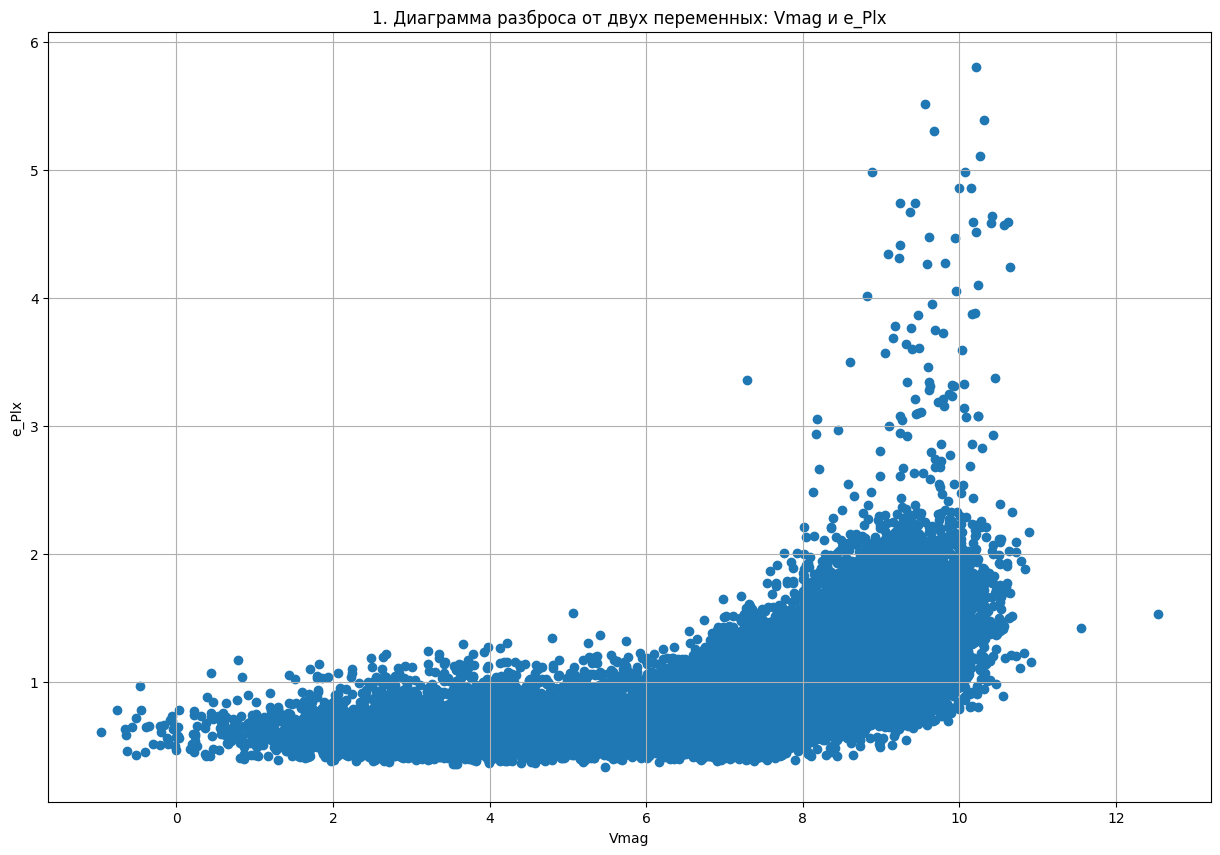

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Vmag'], df['e_Plx'])
plt.title('1. Диаграмма разброса от двух переменных: Vmag и e_Plx')
plt.xlabel('Vmag')
plt.ylabel('e_Plx')
plt.grid(True)
plt.show()

In [3]:
print('1. Диаграма разброса: Определили наличие корреляции или аномальных значений между Vmag и e_Plx. Видим, что с увеличением значений переменной Vmag значения e_Plx также начинают расти, причем более высокие значения Vmag сопровождаются более высокой дисперсией значений e_Plx. Это говорит о наличии положительной корреляции между переменными, а также о возможных аномальных значениях в данных.')

1. Диаграма разброса: Определили наличие корреляции или аномальных значений между Vmag и e_Plx. Видим, что с увеличением значений переменной Vmag значения e_Plx также начинают расти, причем более высокие значения Vmag сопровождаются более высокой дисперсией значений e_Plx. Это говорит о наличии положительной корреляции между переменными, а также о возможных аномальных значениях в данных.


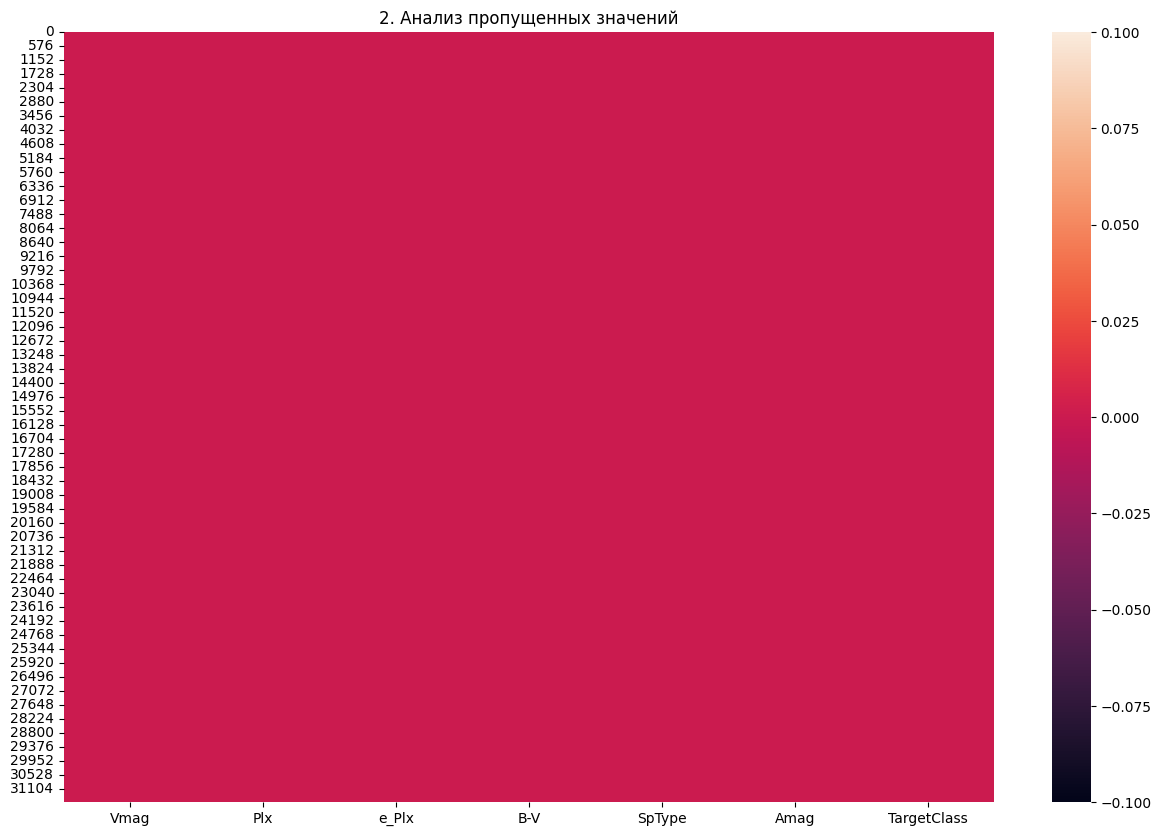

0


In [17]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.title('2. Анализ пропущенных значений')
plt.show()
# print(len(df[df.isnull()].dropna()))

In [4]:
print('2. Анализ пропущенных значений: Выявили, что пропущенных данных нет')

2. Анализ пропущенных значений: Выявили, что пропущенных данных нет


In [5]:
numerical_columns = df.select_dtypes(include='number').columns
numerical_columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag', 'TargetClass'], dtype='object')

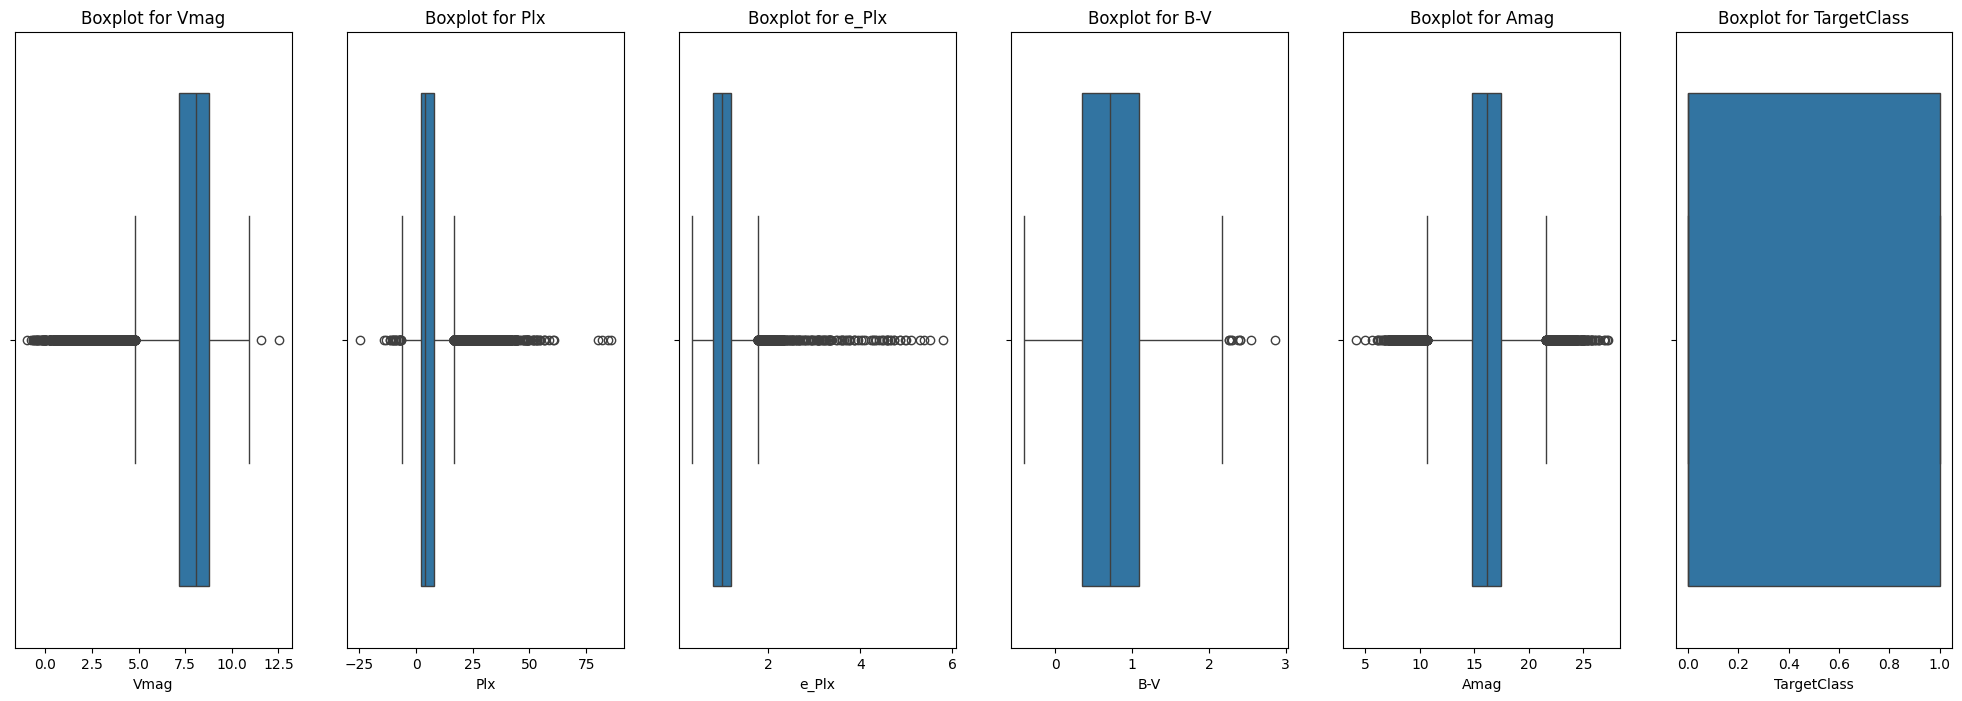

In [58]:
fig, axes = plt.subplots(1, len(numerical_columns), figsize=(25, 8))
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')

plt.show()

In [5]:
print('3. Boxplot: Использование boxplot помогает определить степень симметрии распределения и присутствие потенциальных аномалий. На всех графиках видно наличие значительного числа выбросов. Лишь график для TargetClass тличается, т.к. содержит лишь 0 или 1.')

3. Boxplot: Использование boxplot помогает определить степень симметрии распределения и присутствие потенциальных аномалий. На всех графиках видно наличие значительного числа выбросов. Лишь график для TargetClass тличается, т.к. содержит лишь 0 или 1.


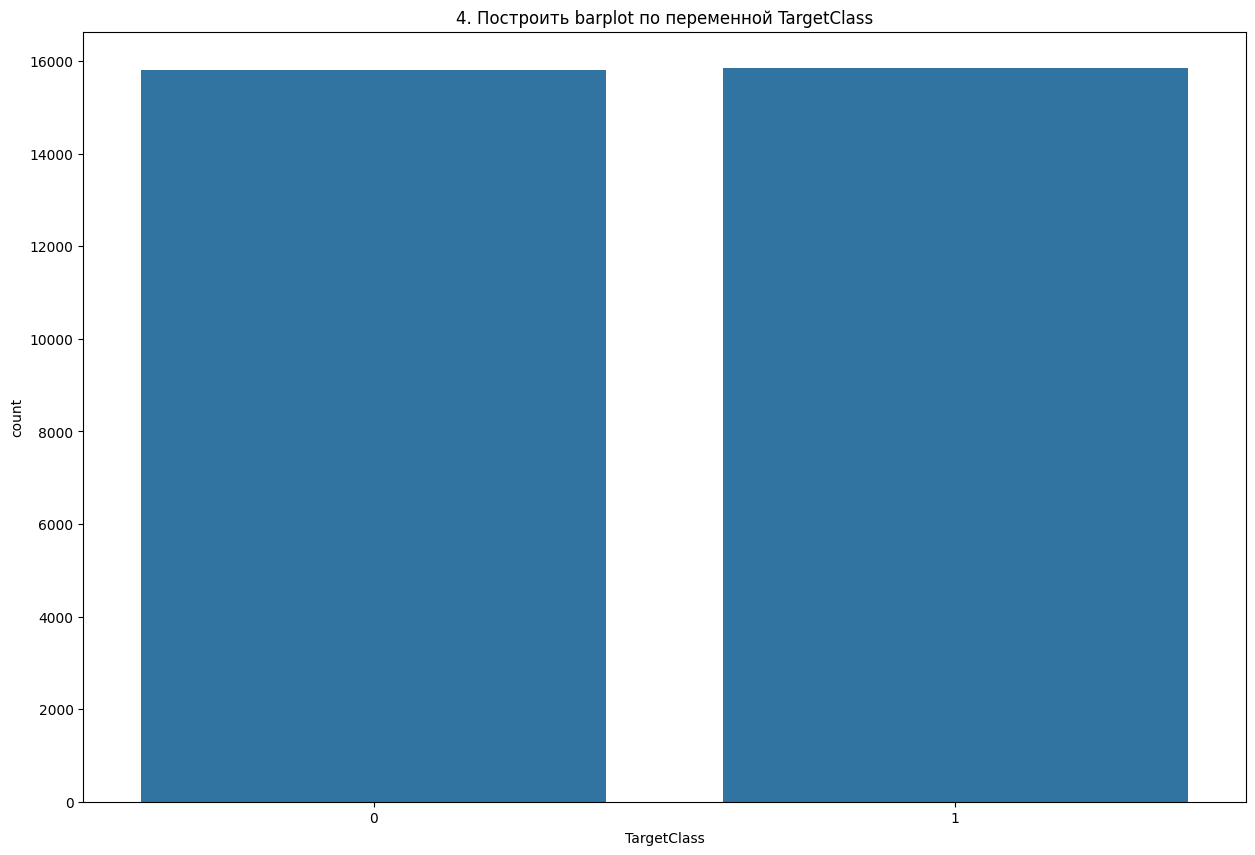

In [55]:
plt.figure(figsize=(15,10))
cnt = df['TargetClass'].value_counts()
sns.barplot(x=df['TargetClass'], y=cnt)
plt.title('4. Построить barplot по переменной TargetClass')
plt.show()

In [8]:
print('4. barplot по переменной TargetClass. в TargetClass встречается только 0 или 1, поэтому видим дисбаланс классов.')

4. barplot по переменной TargetClass. в TargetClass встречается только 0 или 1, поэтому видим дисбаланс классов.


In [66]:
df.corr(numeric_only=True)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
Vmag,1.000000,-0.191414,0.557063,0.046950,0.287126,0.128945
Plx,-0.191414,1.000000,-0.062239,-0.074046,0.635550,0.348977
e_Plx,0.557063,-0.062239,1.000000,0.053166,0.260421,0.102710
B-V,0.046950,-0.074046,0.053166,1.000000,-0.073903,-0.554469
Amag,0.287126,0.635550,0.260421,-0.073903,1.000000,0.442479
TargetClass,0.128945,0.348977,0.102710,-0.554469,0.442479,1.000000


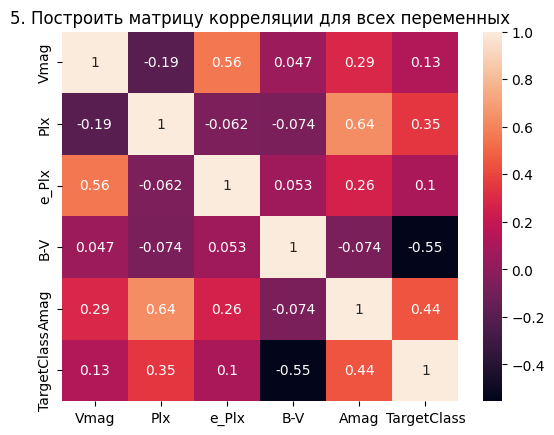

In [69]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

plt.title('5. Построить матрицу корреляции для всех переменных')
plt.show()

In [10]:
print('5. Матрица корреляции: определяет наличие линейной зависимости между числовыми переменными. Высокая положительная корреляция между переменными Plx и Amag (0.64) и между Vmag и e_Plx (0.56), что указывает на сильную линейную зависимость между ними. Отрицательная корреляция между B-V и TargetClass (-0.55) - наоборот')

5. Матрица корреляции: определяет наличие линейной зависимости между числовыми переменными. Высокая положительная корреляция между переменными Plx и Amag (0.64) и между Vmag и e_Plx (0.56), что указывает на сильную линейную зависимость между ними. Отрицательная корреляция между B-V и TargetClass (-0.55) - наоборот


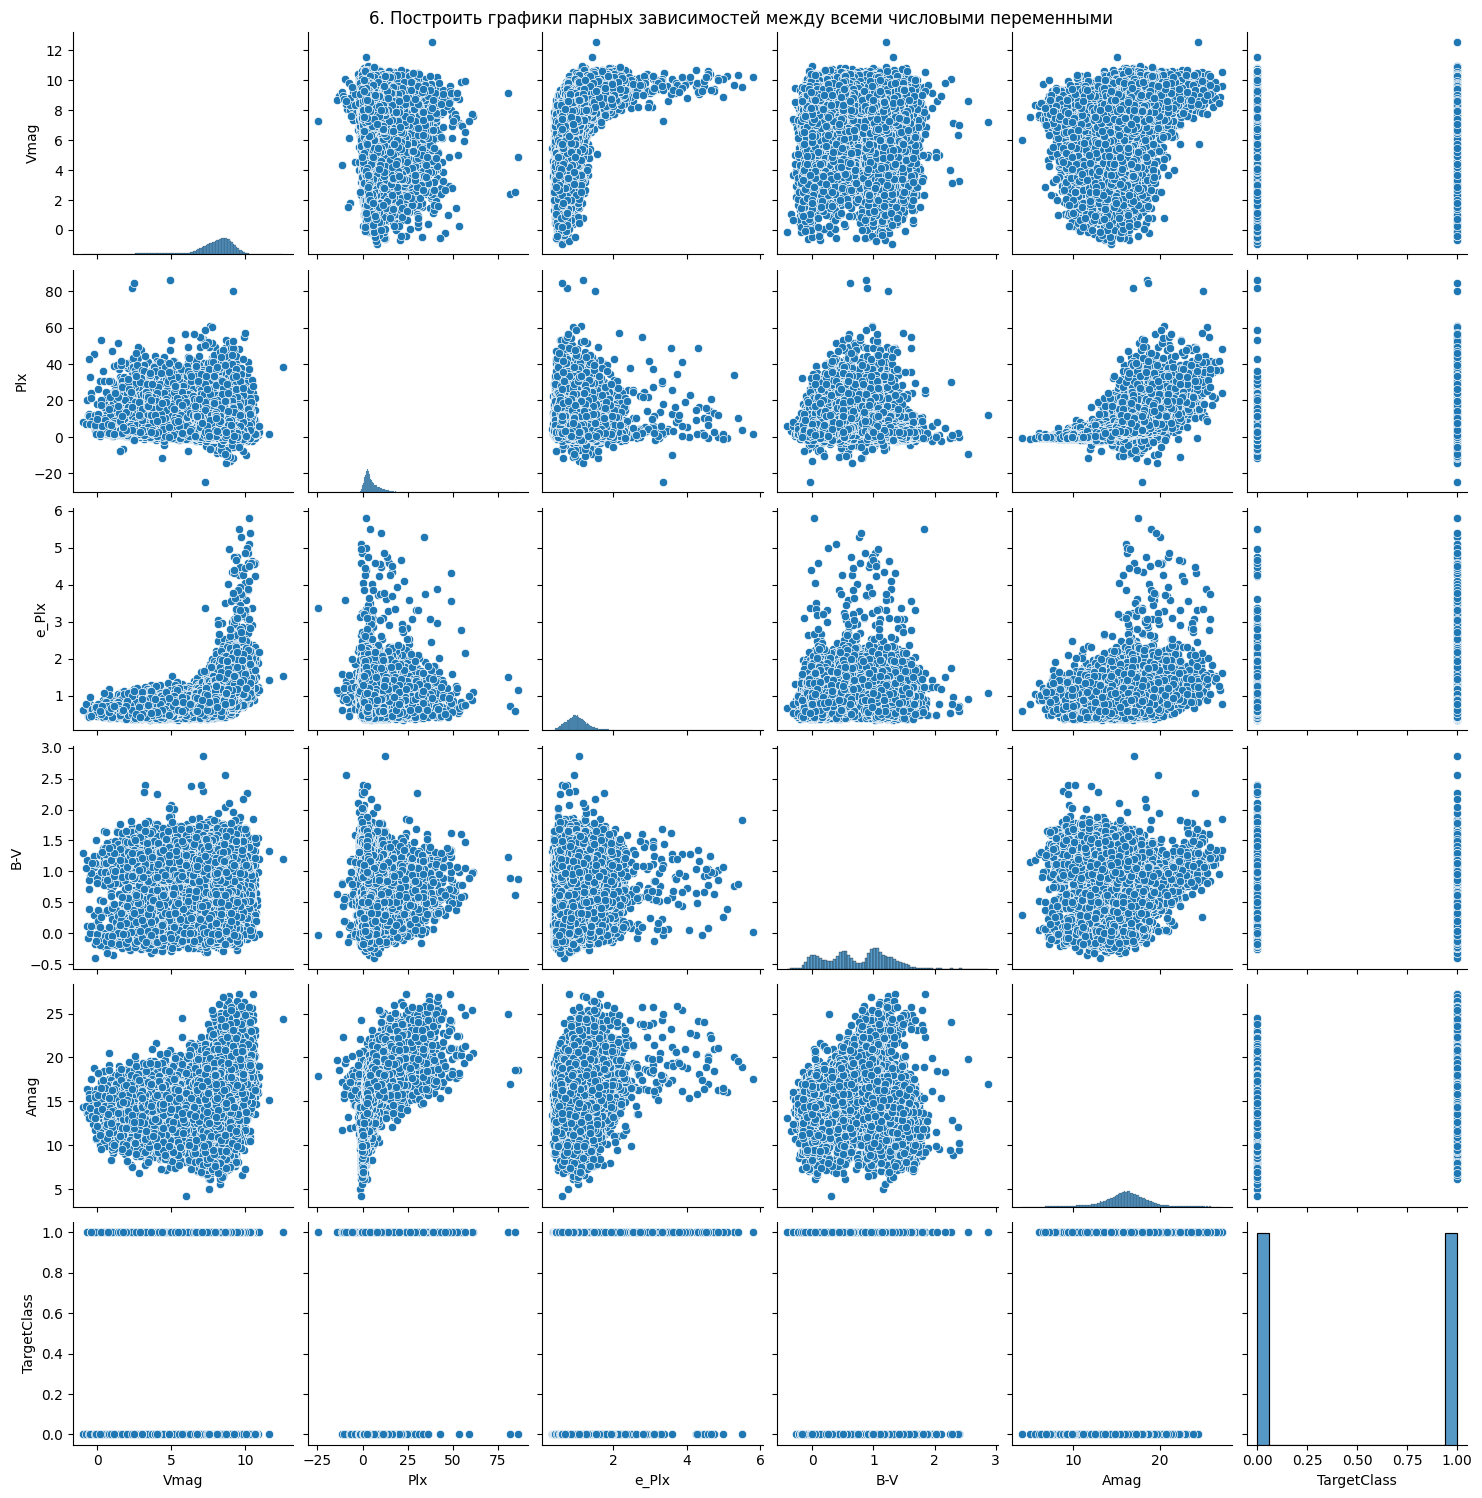

In [6]:
sns.pairplot(df[numerical_columns])
plt.suptitle('6. Построить графики парных зависимостей между всеми числовыми переменными', y=1)
plt.show()

In [11]:
print('6. Графики парных зависимостей: для детального анализа зависимостей между переменными. Например, заметна определённая зависимость между переменными Vmag и Amag, где наблюдается скопление данных в определенных зонах.')

6. Графики парных зависимостей: для детального анализа зависимостей между переменными. Например, заметна определённая зависимость между переменными Vmag и Amag, где наблюдается скопление данных в определенных зонах.


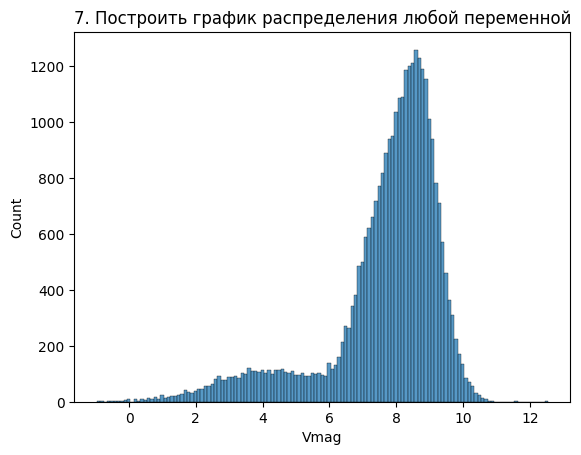

In [7]:
sns.histplot(df['Vmag'])

plt.title('7. Построить график распределения любой переменной')
plt.show()

In [12]:
print('7. График распределения: анализ формы распределения выбранной переменной, выявление нормальности или асимметрии. В данном случае большинство данных скопились в районе 8. Распределение похоже на нормальное, но имеет "скосы", т.к. в правой части значения резко снижаются')

7. График распределения: анализ формы распределения выбранной переменной, выявление нормальности или асимметрии. В данном случае большинство данных скопились в районе 8. Распределение похоже на нормальное, но имеет "скосы", т.к. в правой части значения резко снижаются
